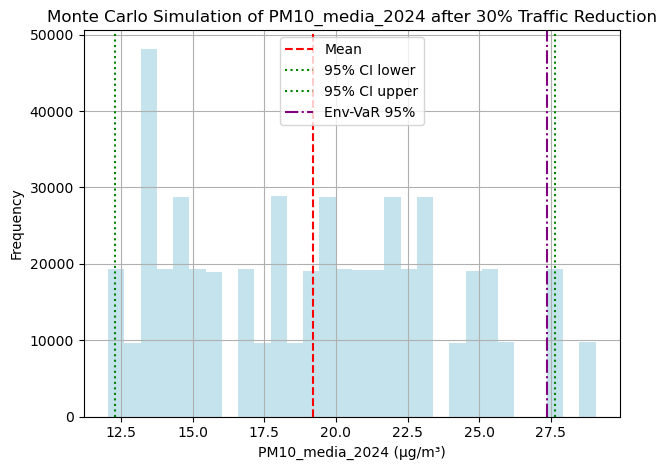

Risultati simulazione PM10:
Media attesa: 19.21 µg/m³
Intervallo di confidenza 95%: [12.29, 27.65]
Env-VaR 95%: 27.37 µg/m³
• Simulazioni effettuate: 500000


In [5]:
import pandas as pd
from simulate import simulate_pollution

# === 1. Carica i file ===
pm10 = pd.read_excel("data/PM10.xlsx")
traffico = pd.read_excel("data/traffico Astrade 2024.xlsx")

# === 2. Pulizia colonne ===
pm10["data"] = pd.to_datetime(pm10["data"], dayfirst=True)
pm10["PM10_media_2024"] = pd.to_numeric(pm10["Media (2024)"], errors="coerce")

traffico["data"] = pd.to_datetime(traffico["data"], dayfirst=True)
traffico["traffico_media_2024"] = pd.to_numeric(traffico["Media (2024)"], errors="coerce")

# === 3. Merge per data ===
df = pd.merge(
    pm10[["data", "PM10_media_2024"]],
    traffico[["data", "traffico_media_2024"]],
    on="data"
).dropna()
N_SIM = 500000
# === 4. Simulazione Monte Carlo ===
results = simulate_pollution(
    df=df,
    pollutant_col="PM10_media_2024",
    traffic_col="traffico_media_2024",
    reduction_pct=0.3,
    n_sim=N_SIM,
    plot=True
)

# === 5. Output a console ===
print("Risultati simulazione PM10:")
print(f"Media attesa: {results['mean']:.2f} µg/m³")
print(f"Intervallo di confidenza 95%: [{results['ci_lower']:.2f}, {results['ci_upper']:.2f}]")
print(f"Env-VaR 95%: {results['env_var_95']:.2f} µg/m³")
print(f"• Simulazioni effettuate: {N_SIM}")